In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime, date
import re
from IPython.display import display, HTML
from tabulate import tabulate
import warnings

In [2]:
file_path='E:/Metro2/raw_data//'
# file_path='E:/Metro2/artifacts//'
df=pd.read_csv(file_path+'Data.csv')

In [3]:
print(df['12c(a)'].value_counts(),df['12c(b)'].value_counts(),df['12c(c)'].value_counts(),df['12c(d)'].value_counts(),df['12c(e)'].value_counts())

12c(a)
Will not use for both trips (ಎರಡೂ ಪ್ರವಾಸಗಳಿಗೆ ಬಳಸಲಾಗುವುದಿಲ್ಲ)                                                                                                                    682
Will use for access trip (ಆಕ್ಸೆಸ್ ಪ್ರಯಾಣ ಬಳಸಲಾಗುವುದು)                                                                                                                             93
Will use for access trip (ಆಕ್ಸೆಸ್ ಪ್ರಯಾಣ ಬಳಸಲಾಗುವುದು), Will use for egress trip (ಎಗ್ರೆಸ್ಸ್ ಪ್ರಯಾಣ ಬಳಸಲಾಗುವುದು)                                                                    65
Will use for egress trip (ಎಗ್ರೆಸ್ಸ್ ಪ್ರಯಾಣ ಬಳಸಲಾಗುವುದು)                                                                                                                           33
Will use for access trip (ಆಕ್ಸೆಸ್ ಪ್ರಯಾಣ ಬಳಸಲಾಗುವುದು), Will not use for both trips (ಎರಡೂ ಪ್ರವಾಸಗಳಿಗೆ ಬಳಸಲಾಗುವುದಿಲ್ಲ)                                                               2
Will use for egress trip (ಎಗ್ರೆಸ್ಸ್ ಪ್ರಯಾಣ ಬಳಸಲಾಗುವುದು), Will not use for both trips (ಎರ

In [4]:
# Function to remove non-English text
def remove_non_english_text(text):
    return re.sub(r'\s*\([^)]*\)', '', text)

# Apply the function to the specified columns
for col in ['12c(a)', '12c(b)', '12c(c)', '12c(d)', '12c(e)']:
    df[col] = df[col].apply(remove_non_english_text)

In [5]:
print(df['12c(a)'].value_counts(),df['12c(b)'].value_counts(),df['12c(c)'].value_counts(),df['12c(d)'].value_counts(),df['12c(e)'].value_counts())

12c(a)
Will not use for both trips                                                        682
Will use for access trip                                                            93
Will use for access trip, Will use for egress trip                                  65
Will use for egress trip                                                            33
Will use for access trip, Will not use for both trips                                2
Will use for egress trip, Will not use for both trips                                2
Will use for access trip, Will use for egress trip, Will not use for both trips      1
Name: count, dtype: int64 12c(b)
Will not use for both trips                              565
Will use for access trip                                 130
Will use for access trip, Will use for egress trip        97
Will use for egress trip                                  80
Will use for egress trip, Will not use for both trips      4
Will use for access trip, Will not use for bot

In [6]:
bicycle_dict={
 'Will use for access trip, Will use for egress trip':'Will use for both trips',
 'Will use for access trip, Will use for egress trip, Will not use for both trips':'all 3 selected',
 'Will use for access trip, Will not use for both trips':'selected 1 and 3',
 'Will use for egress trip, Will not use for both trips':'selected 2 and 3',
 'Will use for egress trip':'Will use for egress trip',
 'Will not use for both trips':'Will not use for both trips',
 'Will use for access trip':'Will use for access trip'
 }

df['12c(a)']=df['12c(a)'].map(bicycle_dict)
df['12c(b)']=df['12c(b)'].map(bicycle_dict)
df['12c(c)']=df['12c(c)'].map(bicycle_dict)
df['12c(d)']=df['12c(d)'].map(bicycle_dict)
df['12c(e)']=df['12c(e)'].map(bicycle_dict)

In [7]:
print(df['12c(a)'].unique(),df['12c(b)'].unique(),df['12c(c)'].unique(),df['12c(d)'].unique(),df['12c(e)'].unique())

['Will not use for both trips' 'Will use for access trip'
 'Will use for both trips' 'Will use for egress trip' 'all 3 selected'
 'selected 1 and 3' 'selected 2 and 3'] ['Will not use for both trips' 'Will use for access trip'
 'Will use for both trips' 'Will use for egress trip' 'selected 2 and 3'
 'selected 1 and 3'] ['Will not use for both trips' 'Will use for access trip'
 'Will use for both trips' 'Will use for egress trip' 'selected 2 and 3'] ['Will not use for both trips' 'Will use for access trip'
 'Will use for egress trip' 'Will use for both trips' 'selected 2 and 3'] ['Will not use for both trips' 'Will use for access trip'
 'Will use for egress trip' 'Will use for both trips' 'selected 2 and 3'
 'selected 1 and 3']


In [8]:
for column in df.select_dtypes(include='object').columns:
    # if re.match(r'^12c\([a-e]\)$', column):
    #     df[column] = df[column].apply(lambda x: 'Will use for both trips' if ',' in x else x)
    df[column] = df[column].str.replace(r'\(.*\)', '', regex=True)


In [9]:
display(HTML(f"<h2>No of samples is {df.shape[0]}</h0>"))

In [10]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y %H:%M')
df['Time stamp time'] = pd.to_datetime(df['Timestamp']).apply(lambda x: x.time())
df['Start time of survey']=pd.to_datetime(df['Start time of survey'])
df['Start time of survey'] = df['Start time of survey'].apply(lambda x: datetime.strftime(x, '%H:%M:%S'))

C:\Users\PC\AppData\Local\Temp\ipykernel_235300\3649880355.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Start time of survey']=pd.to_datetime(df['Start time of survey'])


In [11]:
print(df['12c(a)'].value_counts(),df['12c(b)'].value_counts(),df['12c(c)'].value_counts(),df['12c(d)'].value_counts(),df['12c(e)'].value_counts())

12c(a)
Will not use for both trips    682
Will use for access trip        93
Will use for both trips         65
Will use for egress trip        33
selected 1 and 3                 2
selected 2 and 3                 2
all 3 selected                   1
Name: count, dtype: int64 12c(b)
Will not use for both trips    565
Will use for access trip       130
Will use for both trips         97
Will use for egress trip        80
selected 2 and 3                 4
selected 1 and 3                 2
Name: count, dtype: int64 12c(c)
Will not use for both trips    621
Will use for access trip       106
Will use for egress trip        77
Will use for both trips         72
selected 2 and 3                 2
Name: count, dtype: int64 12c(d)
Will not use for both trips    574
Will use for both trips        138
Will use for access trip        96
Will use for egress trip        68
selected 2 and 3                 2
Name: count, dtype: int64 12c(e)
Will not use for both trips    636
Will use for both tri

In [12]:
# display the column 1 for the entries of 12c(a) to 12c(e) where they are 'all 3 selected'
#  'selected 1 and 3' 'selected 2 and 3'

for column in df.select_dtypes(include='object').columns:
    if re.match(r'^12c\([a-e]\)$', column):
        # remove such entries
        df = df[~df[column].isin(['all 3 selected', 'selected 1 and 3', 'selected 2 and 3'])]
        # print(df.loc[df[column].isin(['all 3 selected', 'selected 1 and 3', 'selected 2 and 3']), [column,'1', 'Timestamp']]) 

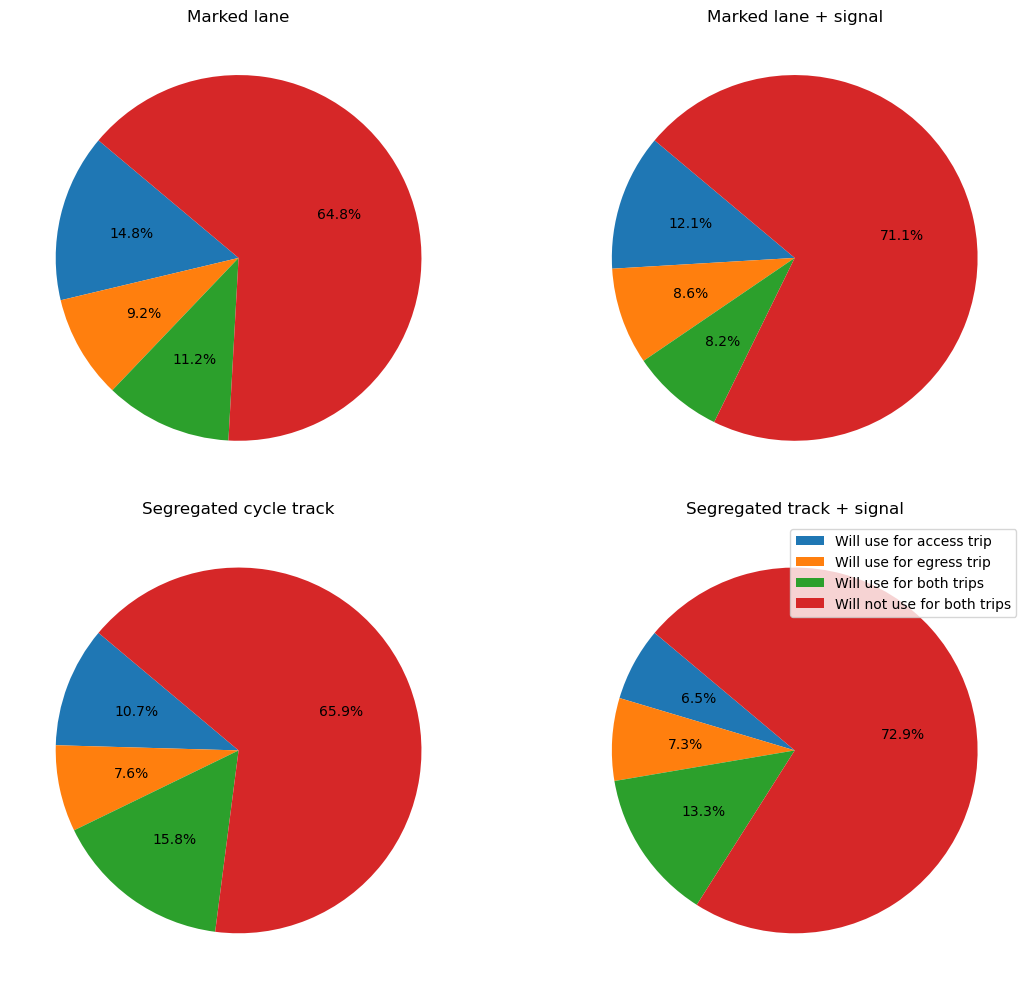

In [13]:
# Define the column names
columns = ['12c(b)', '12c(c)', '12c(d)', '12c(e)']

# Define individual titles for each plot
titles = ['Marked lane', 'Marked lane + signal', 'Segregated cycle track', 'Segregated track + signal']

# Define the order of legend and values
list_order=['Will use for access trip' ,'Will use for egress trip','Will use for both trips','Will not use for both trips']


# Calculate the number of rows required
num_rows = (len(columns) + 1) // 2

# Create a figure and axes for the subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(12, 5*num_rows))

# Flatten the axes array if there's only one row
if num_rows == 1:
    axs = axs.reshape(1, -1)

# Iterate over each column and plot a pie chart
for i, column in enumerate(columns):
    row_index = i // 2
    col_index = i % 2
    
    # Calculate value counts for the column
    counts = df[column].value_counts()[list_order]
    
    # Plot the pie chart without labels
    axs[row_index, col_index].pie(counts, labels=None, autopct='%1.1f%%', startangle=140)
    
    # Set individual titles for each chart
    axs[row_index, col_index].set_title(titles[i])

# Add legend to the top-right corner
plt.legend(list_order, loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
# plt.tight_layout()

In [14]:
df_modified= df[(df['Timestamp'] > '2024-05-17 00:00:00') & (df['Timestamp'] < '2024-05-19 00:00:00')]
df2=df[df['Timestamp']>'2024-05-19 00:00:00']
df1=df[df['Timestamp']<'2024-05-19 00:00:00']

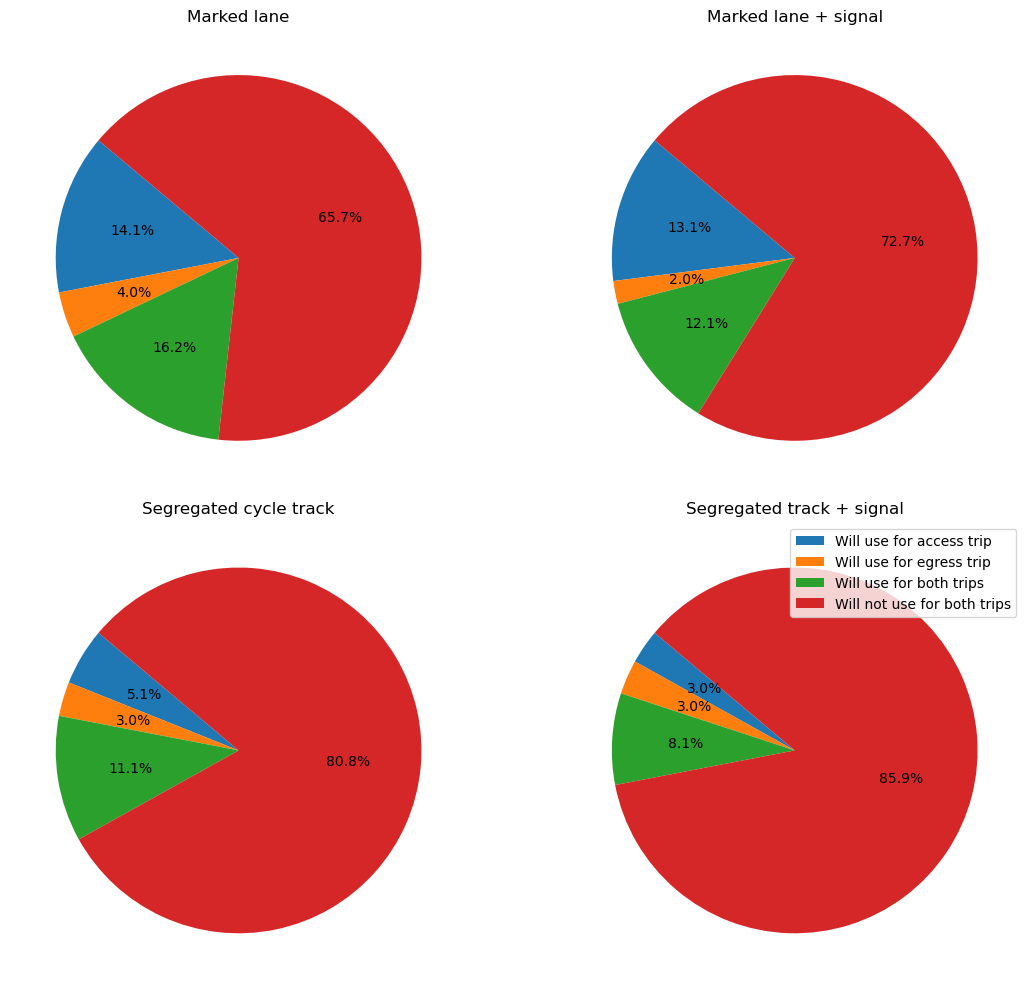

In [15]:
# Define the column names
columns = ['12c(b)', '12c(c)', '12c(d)', '12c(e)']

# Define individual titles for each plot
titles = ['Marked lane', 'Marked lane + signal', 'Segregated cycle track', 'Segregated track + signal']

# Define the order of legend and values
list_order=['Will use for access trip' ,'Will use for egress trip','Will use for both trips','Will not use for both trips']


# Calculate the number of rows required
num_rows = (len(columns) + 1) // 2

# Create a figure and axes for the subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(12, 5*num_rows))

# Flatten the axes array if there's only one row
if num_rows == 1:
    axs = axs.reshape(1, -1)

# Iterate over each column and plot a pie chart
for i, column in enumerate(columns):
    row_index = i // 2
    col_index = i % 2
    
    # Calculate value counts for the column
    counts = df_modified[column].value_counts()[list_order]
    
    # Plot the pie chart without labels
    axs[row_index, col_index].pie(counts, labels=None, autopct='%1.1f%%', startangle=140)
    
    # Set individual titles for each chart
    axs[row_index, col_index].set_title(titles[i])

# Add legend to the top-right corner
plt.legend(list_order, loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
# plt.tight_layout()

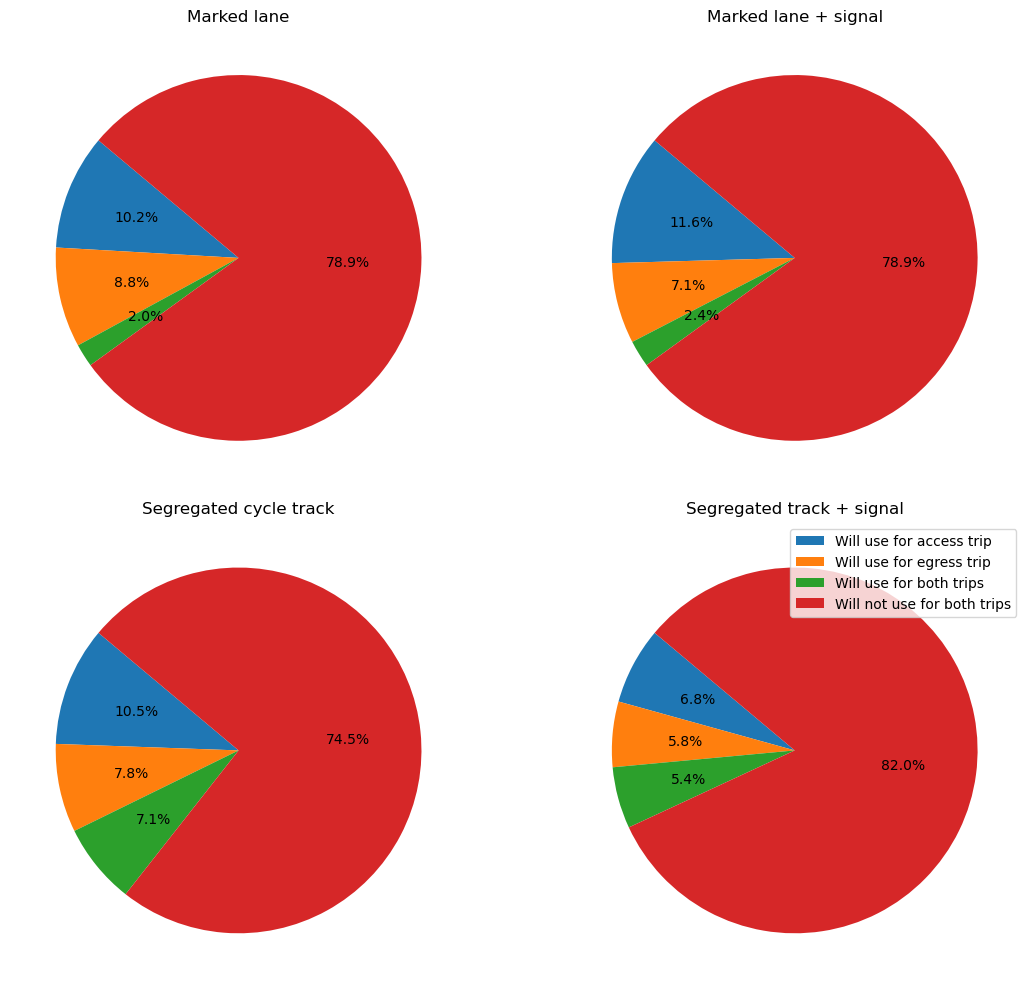

In [16]:
# Define the column names
columns = ['12c(b)', '12c(c)', '12c(d)', '12c(e)']

# Define individual titles for each plot
titles = ['Marked lane', 'Marked lane + signal', 'Segregated cycle track', 'Segregated track + signal']

# Define the order of legend and values
list_order=['Will use for access trip' ,'Will use for egress trip','Will use for both trips','Will not use for both trips']


# Calculate the number of rows required
num_rows = (len(columns) + 1) // 2

# Create a figure and axes for the subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(12, 5*num_rows))

# Flatten the axes array if there's only one row
if num_rows == 1:
    axs = axs.reshape(1, -1)

# Iterate over each column and plot a pie chart
for i, column in enumerate(columns):
    row_index = i // 2
    col_index = i % 2
    
    # Calculate value counts for the column
    counts = df2[column].value_counts()[list_order]
    
    # Plot the pie chart without labels
    axs[row_index, col_index].pie(counts, labels=None, autopct='%1.1f%%', startangle=140)
    
    # Set individual titles for each chart
    axs[row_index, col_index].set_title(titles[i])

# Add legend to the top-right corner
plt.legend(list_order, loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
# plt.tight_layout()

In [104]:
# Plot settings
perception_order=[ 'Very Safe ','Somewhat Safe ', 'Neutral ', 'Somewhat Risky ','Very Risky ']
# Create the plot for Perception_12a
# Reorder the categories
df['12a'] = pd.Categorical(df['12a'], categories=perception_order, ordered=True)
df['12b'] = pd.Categorical(df['12b'], categories=perception_order, ordered=True)

distance_order=[ '< 0.5 km ', '0.5 to 1 km ', '1 km to 1.5 km ', '1.5 km to 2 km ','2 km to 2.5 km ', '2.5 km to 3 km ', 
                '3 km to 3.5 km ','3.5 km to 4 km ', '4 km to 4.5 km ', '4.5 km to 5 km ','> 5 km ']

df['10b']=pd.Categorical(df['10b'], categories=distance_order, ordered=True)
df['11b']=pd.Categorical(df['11b'], categories=distance_order, ordered=True)

In [105]:
age_map={'36-45 yrs ':'36-45 yrs ', '26-35 yrs ':'26-35 yrs ', '18-25 yrs ':'18-25 yrs ', '46-60 yrs ':'>46 yrs',
       '> 60 yrs ':'>46 yrs'}

df['18']=df['18'].map(age_map)

In [106]:
display(HTML(f"<h2>Perception of traffic on using bicycle</h0>"))
display(HTML(f"<h0>variation of perception with age</h0>"))

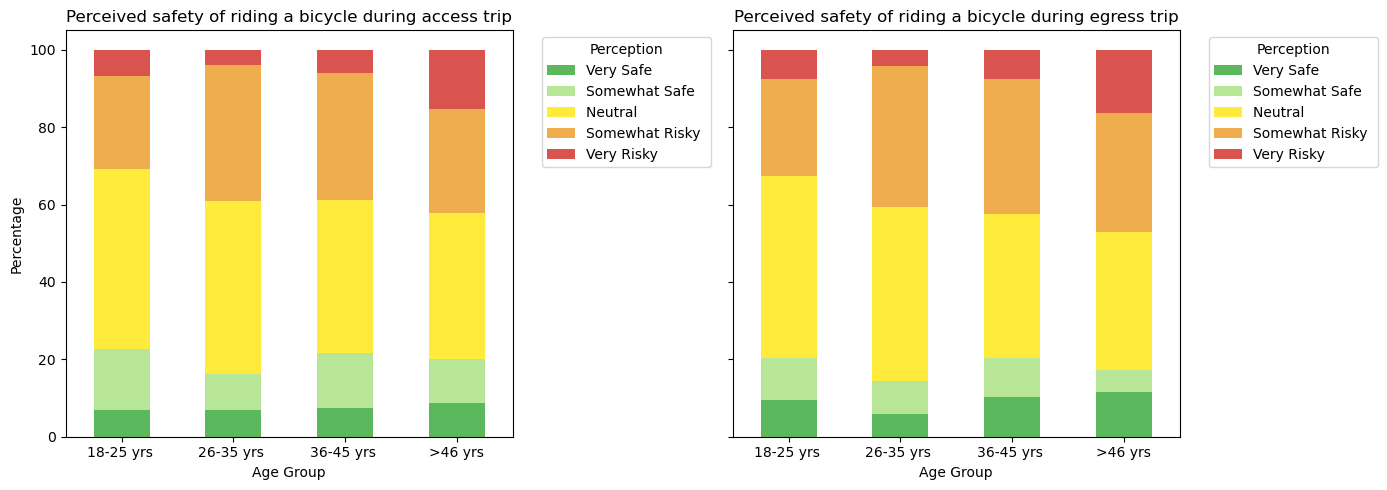

In [107]:

warnings.filterwarnings('ignore',message='.*The default of observed=False is deprecated*')
# Plot settings
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5), sharey=True)

# Function to plot a stacked bar chart for a given column
def plot_stacked_bar(ax, column, title):
    # Count the occurrences
    age_perception_counts = df.groupby(['18', column]).size().unstack(fill_value=0)
    
    # Reindex to ensure the correct order
    # age_perception_counts = age_perception_counts[perception_order]
    
    # Normalize to get percentages
    age_perception_percentages = age_perception_counts.div(age_perception_counts.sum(axis=1), axis=0) * 100
    
    # Define a color palette that goes from safe to risky
    colors = ['#5cb85c','#B6E696','#ffeb3b','#f0ad4e', '#d9534f']
    
    # Plot
    age_perception_percentages.plot(kind='bar', stacked=True, color=colors, ax=ax)
    ax.set_xlabel('Age Group')
    ax.set_ylabel('Percentage')
    ax.set_title(title)
    ax.legend(title='Perception', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_xticklabels(age_perception_percentages.index, rotation=0)

# Plot for Perception_12a
plot_stacked_bar(axes[0], '12a', 'Perceived safety of riding a bicycle during access trip')

# Plot for Perception_12b
plot_stacked_bar(axes[1], '12b', 'Perceived safety of riding a bicycle during egress trip')

plt.tight_layout()
plt.show()

In [108]:
display(HTML(f"<h0>variation of perception in gender</h0>"))

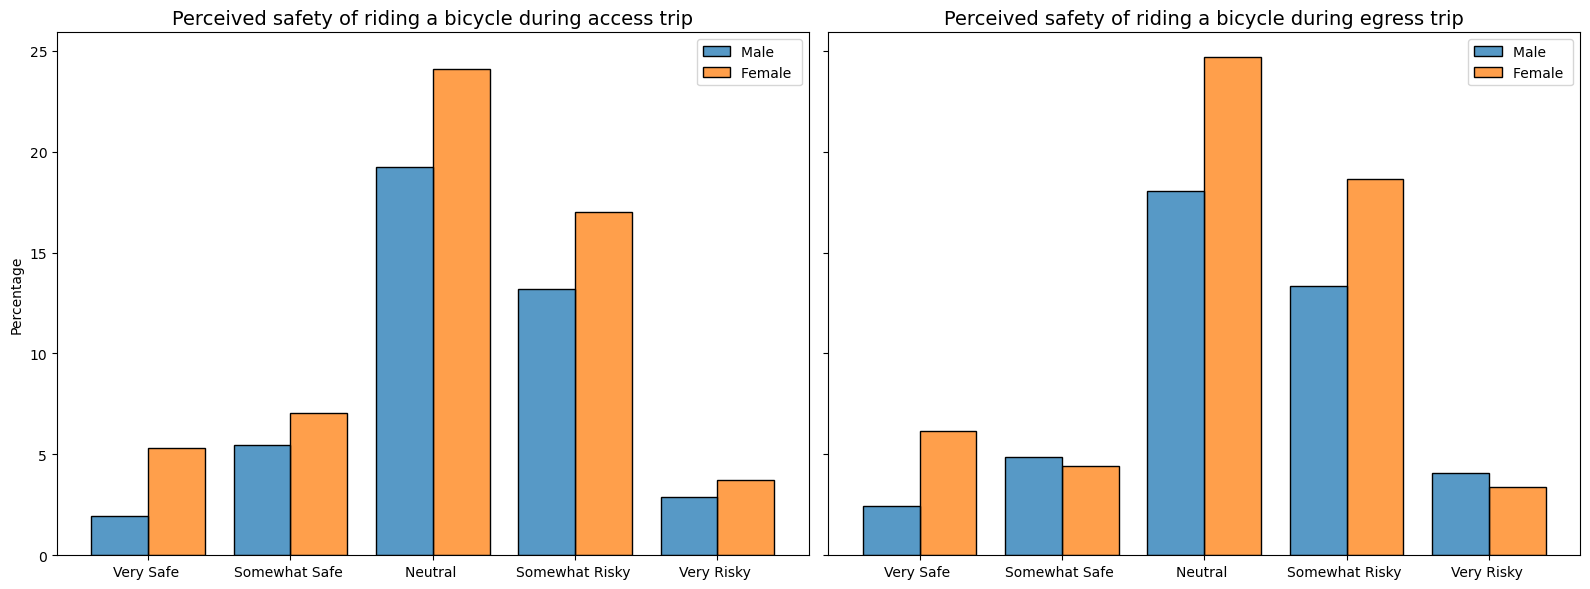

In [109]:

warnings.filterwarnings("ignore", message=".*use_inf_as_na option is deprecated.*")
# Plot settings
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=True)

# Plot for Perception_12a
sns.histplot(data=df, x="12a", hue="17", multiple="dodge", shrink=.8, stat="percent", discrete=True, ax=axes[0])
axes[0].set_xlabel(None)
axes[0].set_ylabel('Percentage')
axes[0].set_title('Perceived safety of riding a bicycle during access trip', fontsize=14)
legend = axes[0].get_legend()
if legend:
    legend.set_title('')



# Plot for Perception_12b
sns.histplot(data=df, x="12b", hue="17", multiple="dodge", shrink=.8, stat="percent", discrete=True, ax=axes[1])
axes[1].set_xlabel(None)
axes[1].set_ylabel('Percentage')
axes[1].set_title('Perceived safety of riding a bicycle during egress trip',fontsize=14)
legend = axes[1].get_legend()
if legend:
    legend.set_title('')

plt.tight_layout()
plt.show()

In [110]:
df['10'].unique()
mode_dict={'Drove and parked a two-Wheeler ':'Drove', 'Walk ':'Walk',
       'Dropped-off by friends/family members/others using two-wheeler ':'Ride hire',
       'Drove and parked a car ':'Drove', 'Auto Rickshaw ':'Ride hire', 'Ola/Uber car ':'Ride hire',
       'Dropped-off by friends/family members/others using car ':'Ride hire', 'Bus':'Ride hire',
       'Rapido/Uber moto/Ola App two-wheeler ':'Ride hire',
       'Rapido/uber moto/Ola App two-wheeler ':'Ride hire'}

df['10']=df['10'].map(mode_dict)
df['11']=df['11'].map(mode_dict)

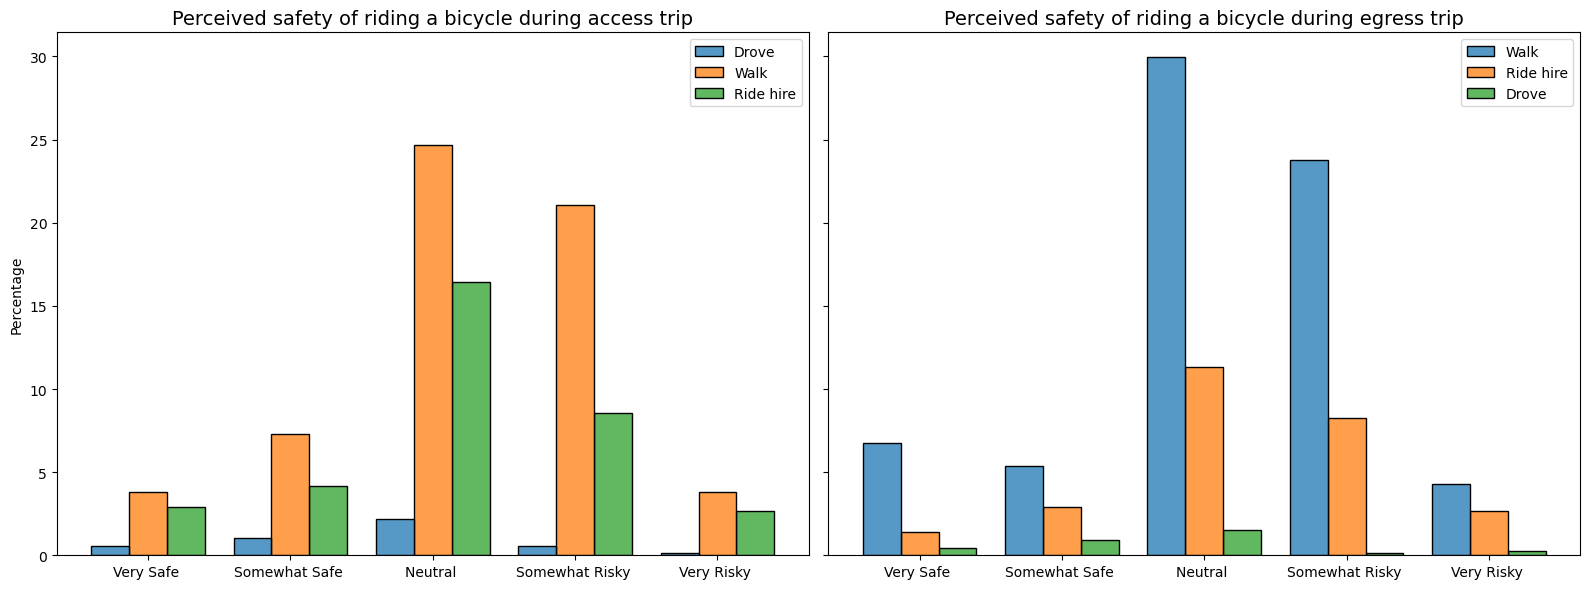

In [111]:

warnings.filterwarnings("ignore", message=".*use_inf_as_na option is deprecated.*")
# Plot settings
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=True)

# Plot for Perception_12a
sns.histplot(data=df, x="12a", hue="10", multiple="dodge", shrink=.8, stat="percent", discrete=True, ax=axes[0])
axes[0].set_xlabel(None)
axes[0].set_ylabel('Percentage')
axes[0].set_title('Perceived safety of riding a bicycle during access trip', fontsize=14)
legend = axes[0].get_legend()
if legend:
    legend.set_title('')



# Plot for Perception_12b
sns.histplot(data=df, x="12b", hue="11", multiple="dodge", shrink=.8, stat="percent", discrete=True, ax=axes[1])
axes[1].set_xlabel(None)
axes[1].set_ylabel('Percentage')
axes[1].set_title('Perceived safety of riding a bicycle during egress trip',fontsize=14)
legend = axes[1].get_legend()
if legend:
    legend.set_title('')

plt.tight_layout()
plt.show()

In [112]:
df['10b'].unique()
dict={'3.5 km to 4 km ':'>3 km ', '0.5 to 1 km ':'0.5 to 1 km ', '1 km to 1.5 km ':'1 km to 1.5 km ', '< 0.5 km ':'< 0.5 km ',
 '2 km to 2.5 km ':'1.5 to 3 km ', '2.5 km to 3 km ':'1.5 to 3 km ', '> 5 km ':'>3 km ', '3 km to 3.5 km ':'>3 km ', '4 km to 4.5 km ': '>3 km ', 
 '4.5 km to 5 km ':'>3 km ', '1.5 km to 2 km ':'1.5 to 3 km ','> 5 km ':'>3 km ', '3.5 km to 4 km ':'>3 km '}
df['10b']=df['10b'].map(dict)
df['11b']=df['11b'].map(dict)

In [113]:
order=['< 0.5 km ', '0.5 to 1 km ', '1 km to 1.5 km ', '1.5 to 3 km ', '>3 km ']

df['10b']=pd.Categorical(df['10b'], categories=order, ordered=True)
df['11b']=pd.Categorical(df['11b'], categories=order, ordered=True)

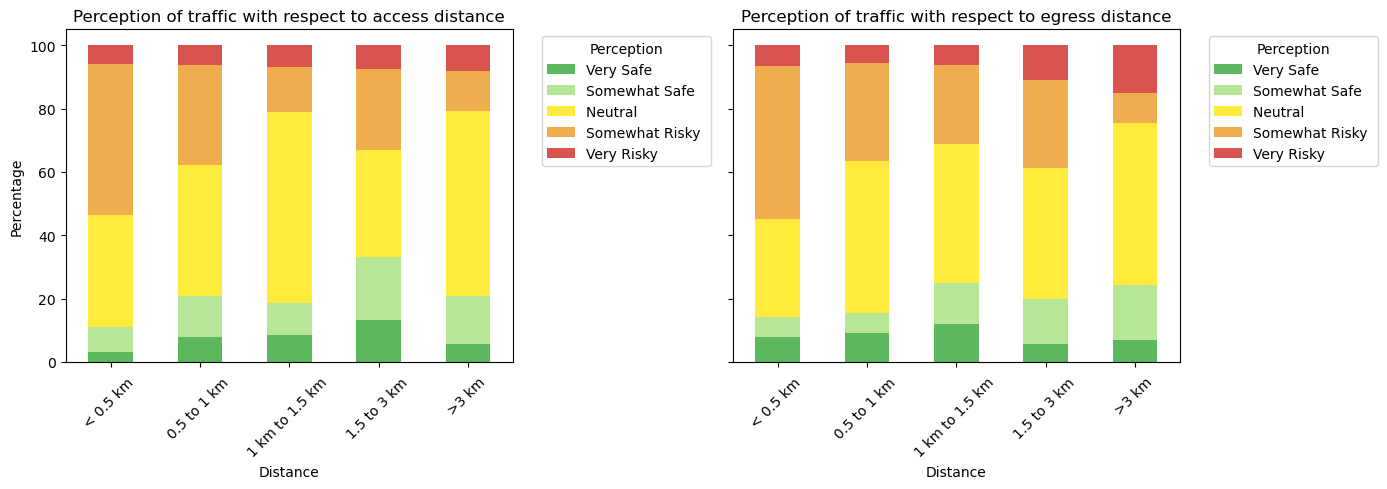

In [114]:
perception_order = ['Very Safe ', 'Somewhat Safe ', 'Neutral ', 'Somewhat Risky ', 'Very Risky ']

# Function to plot a stacked bar chart for given columns
def plot_stacked_bar(ax, distance_column, perception_column, title):
    # Count the occurrences
    counts = df.groupby([distance_column, perception_column]).size().unstack(fill_value=0)
    
    # Reindex to ensure the correct order
    counts = counts.reindex(columns=perception_order).fillna(0)
    
    # Normalize to get percentages
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100
    
    # Define a color palette that goes from safe to risky
    colors = ['#5cb85c', '#B6E696', '#ffeb3b', '#f0ad4e', '#d9534f']
    
    # Plot
    percentages.plot(kind='bar', stacked=True, color=colors, ax=ax)
    ax.set_xlabel(distance_column)
    ax.set_ylabel('Percentage')
    ax.set_title(title)
    ax.legend(title='Perception', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_xticklabels(percentages.index, rotation=45)
    ax.set_xlabel('Distance')

# Plot settings for 10b and 12a
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5), sharey=True)

plot_stacked_bar(axes[0], '10b', '12a', 'Perception of traffic with respect to access distance')
plot_stacked_bar(axes[1], '11b', '12b', 'Perception of traffic with respect to egress distance')

plt.tight_layout()
plt.show()

In [115]:
perception_dict={'Very Safe ':-2,'Somewhat Safe ':-1, 'Neutral ':0, 'Somewhat Risky ':2, 'Very Risky ':1}

df['12a']=df['12a'].map(perception_dict)
df['12b']=df['12b'].map(perception_dict)

# print(df.groupby('18')['12a'].mean(),df.groupby('18')['12b'].mean())

In [116]:
df['23'].unique()

array(['No, I will not use a bicycle. ',
       'Current travelling conditions with no special cycling facility. Per Trip cost 0₹. Parking cost of 10₹ per day. ',
       'If a marked cycle lane is provided. Per Trip cost 1₹. Parking cost 10₹ per day. ',
       'Not Applicable- because neither of my trip end is home. ',
       'If a marked cycle lane provided along with bicycle traffic signals is provided. Per Trip cost 2₹. Parking cost 10₹ per day. ',
       'If a segregated cycle track is provided. Per Trip cost 3₹.. Parking cost 10₹ per day. ',
       'If a segregated cycle track with bicycle signal is provided. Per Trip cost 4₹. Parking cost 10₹ per day. ',
       'If a segregated cycle track provided along with bicycle traffic signals. At traffic signals, there is a separate signal phase for bicycle movement.Additional cost Per Trip 4₹ . .                                                                                                                                                 

In [29]:
df['PARK']=1

df.loc['23'==0,'PARK']=0

Index(['Timestamp', 'Start time of survey', '1', '2', '2c', '2d', '3', '4',
       '5', '6', '7', '8', '9', '10', '10a', '10b', '10c', '11', '11a', '11b',
       '11c', '12a', '12b', '12c(a)', '12c(b)', '12c(c)', '12c(d)', '12c(e)',
       '13a', '13b', '14', '15', '16', '17', '17a', '17b', '17c', '17d', '18',
       '19', '20', '21', '22a', '22b', '22c', '22d', '23', '24', '25', '46',
       '47', 'Time stamp time'],
      dtype='object')